In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv("C:\\Users\\91904\\OneDrive\\Desktop\\project\\Nifty.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800


In [3]:
series_shifted = data['Close'].shift()
data['Prev_close'] = series_shifted
data.head()

,Date,Open,High,Low,Close,Volume,Prev_close
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900,NaN
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200,8395.450195
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800,8378.400391
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100,8127.350098
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800,8102.100098


In [4]:
#time format
data['Date'] = pd.to_datetime(data.Date)
data.head()

,Date,Open,High,Low,Close,Volume,Prev_close
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900,NaN
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200,8395.450195
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800,8378.400391
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100,8127.350098
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800,8102.100098


In [5]:
data.shape

(2213, 7)

In [6]:
#null entries
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Prev_close    1
dtype: int64

In [7]:
#drop / remove
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data["Prev_close"]=pd.to_numeric(data.Prev_close,errors='coerce')

data.dropna(inplace=True)
data

,Date,Open,High,Low,Close,Volume,Prev_close
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200,8395.450195
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800,8378.400391
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100,8127.350098
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800,8102.100098
5,2015-01-09,8285.450195,8303.299805,8190.799805,8284.500000,148000,8234.599609
...,...,...,...,...,...,...,...
2208,2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,21255.050781
2209,2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,21349.400391
2210,2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,21441.349609
2211,2023-12-28,21715.000000,21801.449219,21678.000000,21778.699219,393100,21654.750000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 1 to 2212
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2212 non-null   datetime64[ns]
 1   Open        2212 non-null   float64       
 2   High        2212 non-null   float64       
 3   Low         2212 non-null   float64       
 4   Close       2212 non-null   float64       
 5   Volume      2212 non-null   int64         
 6   Prev_close  2212 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 138.2 KB


<Axes: >

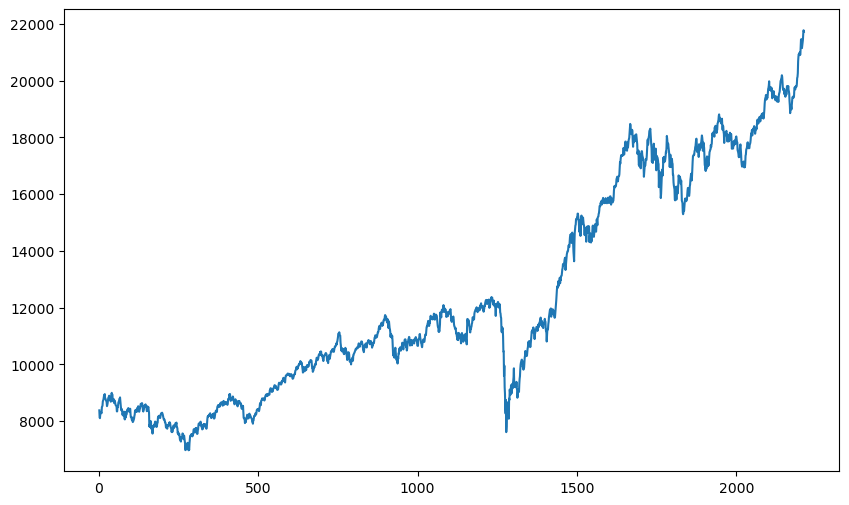

In [9]:
#Plt close prices
data['Date'].plot(figsize=(10,6))

In [10]:
#x and y
x = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [12]:
print(x_train.shape,x_test.shape)


(1659, 4) (553, 4)


In [13]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [14]:
#print regressor
print(regressor.coef_)
print(regressor.intercept_)

[-7.12762807e-01  9.46043765e-01  7.67199531e-01 -5.27201875e-06]
-6.987183088283928


In [15]:
#predicted value
predicted = regressor.predict(x_test)
print(x_test)


              Open          High           Low   Volume
649    9907.150391   9925.750000   9882.000000   159600
811   10578.099609  10636.799805  10569.000000   219200
1549  14710.500000  14890.250000  14694.950195   457000
400    8628.349609   8642.150391   8580.000000   187500
1526  14736.299805  14763.900391  14597.849609   459000
...            ...           ...           ...      ...
1387  11777.549805  11794.250000  11325.849609  1371800
1437  12556.400391  12643.900391  12475.250000   847500
1064  11322.400391  11357.599609  11255.049805   373000
1736  17001.550781  17309.150391  16836.800781   326500
2091  19406.599609  19434.150391  19300.000000   226900

[553 rows x 4 columns]


In [16]:
predicted.shape

(553,)

In [17]:
_data = pd.DataFrame({'Actual': y_test,'Predicted': predicted})
print(_data)

            Actual     Predicted
649    9912.799805   9902.382746
811   10614.349609  10623.591198
1549  14864.549805  14866.293301
400    8632.599609   8600.482095
1526  14736.400391  14653.865831
...            ...           ...
1387  11387.500000  11438.244386
1437  12631.099609  12571.498671
1064  11301.799805  11300.515696
1736  17277.949219  17165.617911
2091  19389.000000  19352.021937

[553 rows x 2 columns]


In [18]:
regressor.score(x_test,y_test)

0.9998975050143531

In [19]:
import math
print("Mean_Absolute_Error:",metrics.mean_absolute_error(y_test,predicted))
print("Mean_Square_Error:",metrics.mean_squared_error(y_test,predicted))
print("Root_Mean_Error:",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean_Absolute_Error: 27.046652061629334
Mean_Square_Error: 1523.8079191493061
Root_Mean_Error: 39.035982364343106


In [20]:
predicted=regressor.predict(x)
print(predicted)

[ 8406.20279077  8159.67194289  8104.6777136  ... 21666.71132302
 21769.77256564 21723.96104501]


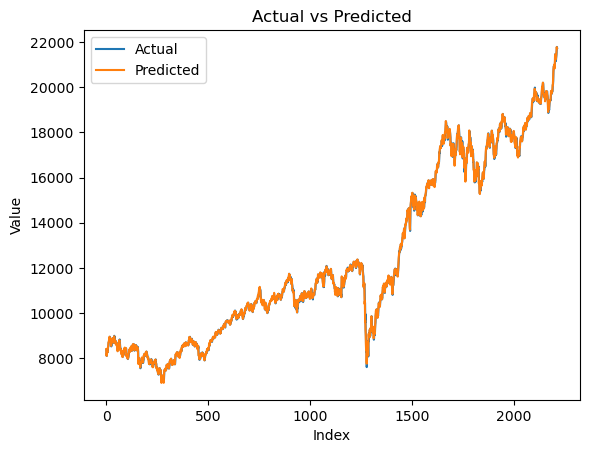

In [21]:
#plot the graph
plt.plot(y,label="Actual")
plt.plot(predicted,label ="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()